<a href="https://colab.research.google.com/github/thesyamarcella/UTS-Machine-Learning-2023-2024/blob/main/UTS_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## UTS Machine Learning



# 1. Identifikasi Nama dan Jenis Atribut

---
**Atribut prediktor**
--- ---
1. battery_power 🡪 Numerik (Continuous)
2. blue 🡪 Kategorik (Binary). Nilai: 0, 1
3. clock_speed 🡪 Numerik (Continuous)
4. dual_sim 🡪 Kategorik (Binary). Nilai: 0, 1
5. fc 🡪 Numerik (Continuous)
6. four_g 🡪 Kategorik (Binary). Nilai: 0, 1
7. int_memory 🡪 Numerik (Continuous)
8. m_dep 🡪 Numerik (Continuous)
9. mobile_wt 🡪 Numerik (Continuous)
10. n_cores 🡪 Numerik (Continuous)
11. pc 🡪 Numerik (Continuous)
12. px_height 🡪 Numerik (Continuous)
13. px_width 🡪 Numerik (Continuous)
14. ram 🡪 Numerik (Continuous)
15. sc_h 🡪 Numerik (Continuous)
16. sc_w 🡪 Numerik (Continuous)
27. talk_time 🡪 Numerik (Continuous)
18. three_g 🡪 Kategorik (Binary). Nilai : 0, 1
19. touch_screen 🡪 Kategorik (Binary). Nilai: 0, 1
20. wifi 🡪 Kategorik (Binary). Nilai: 0, 1
---
---
**Atribut label:**
--- ---
price_range 🡪 Kategorik. Nilai: 0, 1, 2, 3
--- ---


# 2. Praprosessing Data

In [ ]:
# Importing libraries
!pip install --upgrade kneed

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, silhouette_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Menampilkan dataset
url = 'https://raw.githubusercontent.com/isnanmulia/lecture-datasets/main/mobileprice_modified.csv'
dataset = pd.read_csv(url)
print(dataset)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             842.0     0          2.2         0   1       0         7.0   
1            1021.0     1          0.5         1   0       1        53.0   
2             563.0     1          0.5         1   2       1        41.0   
3             615.0     1          2.5         0   0       0        10.0   
4            1821.0     1          1.2         0  13       1        44.0   
...             ...   ...          ...       ...  ..     ...         ...   
1995          794.0     1          0.5         1   0       1         2.0   
1996         1965.0     1          2.6         1   0       0        39.0   
1997         1911.0     0          0.9         1   1       1        36.0   
1998         1512.0     0          0.9         0   4       1        46.0   
1999          510.0     1          2.0         1   5       1        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0     

In [ ]:
# Memisahkan atribut prediktor dan atribut label
x = dataset.drop(columns=["price_range"])
y = dataset["price_range"]

print("Atribut Prediktor (Fitur):")
print(x.head())

print("\nAtribut Label:")
print(y.head())

Atribut Prediktor (Fitur):
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0          842.0     0          2.2         0   1       0         7.0    0.6   
1         1021.0     1          0.5         1   0       1        53.0    0.7   
2          563.0     1          0.5         1   2       1        41.0    0.9   
3          615.0     1          2.5         0   0       0        10.0    0.8   
4         1821.0     1          1.2         0  13       1        44.0    0.6   

   mobile_wt  n_cores  pc  px_height  px_width     ram  sc_h  sc_w  talk_time  \
0      188.0        2   2         20       756     NaN     9     7         19   
1      136.0        3   6        905      1988  2631.0    17     3          7   
2      145.0        5   6       1263      1716  2603.0    11     2          9   
3      131.0        6   9       1216      1786  2769.0    16     8         11   
4      141.0        2  14       1208      1212  1411.0     8     2         15   

   th

In [ ]:
# Handling Missing Values
imputer = SimpleImputer(fill_value=np.nan, strategy="mean")

x_imputed = imputer.fit_transform(x)
x_imputed_df = pd.DataFrame(x_imputed, columns=x.columns)

print("Atribut Prediktor setelah Pengisian Missing Values:")
print(x_imputed_df.head())

Atribut Prediktor setelah Pengisian Missing Values:
   battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0          842.0   0.0          2.2       0.0   1.0     0.0         7.0   
1         1021.0   1.0          0.5       1.0   0.0     1.0        53.0   
2          563.0   1.0          0.5       1.0   2.0     1.0        41.0   
3          615.0   1.0          2.5       0.0   0.0     0.0        10.0   
4         1821.0   1.0          1.2       0.0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores    pc  px_height  px_width         ram  sc_h  \
0    0.6      188.0      2.0   2.0       20.0     756.0  2124.99196   9.0   
1    0.7      136.0      3.0   6.0      905.0    1988.0  2631.00000  17.0   
2    0.9      145.0      5.0   6.0     1263.0    1716.0  2603.00000  11.0   
3    0.8      131.0      6.0   9.0     1216.0    1786.0  2769.00000  16.0   
4    0.6      141.0      2.0  14.0     1208.0    1212.0  1411.00000   8.0   

   sc_w  talk_time  three_g  touch

In [ ]:
# Random Sampling
data_sampling = dataset.sample(n = 10, replace=True)
print(data_sampling.head(10))

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1608         1129.0     1          0.8         1   9       1        21.0   
1419          820.0     0          0.5         1   2       0        58.0   
1995          794.0     1          0.5         1   0       1         2.0   
1130         1975.0     1          1.9         1   2       0        31.0   
565          1271.0     1          0.5         0  12       0        32.0   
1623         1862.0     0          1.5         0   1       0        62.0   
626          1620.0     1          2.2         1   0       1        30.0   
1377         1071.0     0          2.6         0   0       0        49.0   
1787         1830.0     1          1.0         0   7       1        47.0   
102           543.0     0          0.5         0   0       0        57.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
1608    0.6      116.0        2  ...       1128      1702  1400.0    11     0   
1

In [ ]:
# Scaling Data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_imputed_df)
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

print("Atribut Prediktor setelah Scaling:")
print(x_scaled_df.head())

Atribut Prediktor setelah Scaling:
   battery_power  blue  clock_speed  dual_sim        fc  four_g  int_memory  \
0       0.227789   0.0         0.68       0.0  0.052632     0.0    0.080645   
1       0.347361   1.0         0.00       1.0  0.000000     1.0    0.822581   
2       0.041416   1.0         0.00       1.0  0.105263     1.0    0.629032   
3       0.076152   1.0         0.80       0.0  0.000000     0.0    0.129032   
4       0.881764   1.0         0.28       0.0  0.684211     1.0    0.677419   

      m_dep  mobile_wt   n_cores    pc  px_height  px_width       ram  \
0  0.555556   0.900000  0.142857  0.10   0.010204  0.170895  0.499463   
1  0.666667   0.466667  0.285714  0.30   0.461735  0.993324  0.634687   
2  0.888889   0.541667  0.571429  0.30   0.644388  0.811749  0.627205   
3  0.777778   0.425000  0.714286  0.45   0.620408  0.858478  0.671566   
4  0.555556   0.508333  0.142857  0.70   0.616327  0.475300  0.308658   

       sc_h      sc_w  talk_time  three_g  touch_sc

In [ ]:
# Menampilkan Statistik Deskriptif
print("Statistik deskriptif sebelum pengisian missing values:")
print(x.describe())

print("\nStatistik deskriptif setelah pengisian missing values dan standarisasi:")
print(x_scaled_df.describe())

Statistik deskriptif sebelum pengisian missing values:
       battery_power       blue  clock_speed     dual_sim           fc  \
count    1990.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1237.867839     0.4950     1.522250     0.509500     4.309500   
std       439.676025     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       850.250000     0.0000     0.700000     0.000000     1.000000   
50%      1225.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.000000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  1990.000000  2000.000000  1990.000000  2000.000000   
mean      0.521500    31.987940     0.501750   140.344221     4.520500   
std       0.499662    18.136427     0.288416    35.40711

# 3. Model Klasifikasi: Algoritma SVM

metode holdout dengan proporsi 80% data training dan 20% data testing


--- ---

In [ ]:
# Bagi dataset menjadi data training (80%) dan data testing (20%)
x_train, x_test, y_train, y_test = train_test_split(x_scaled_df, y, test_size=0.2, random_state=0)


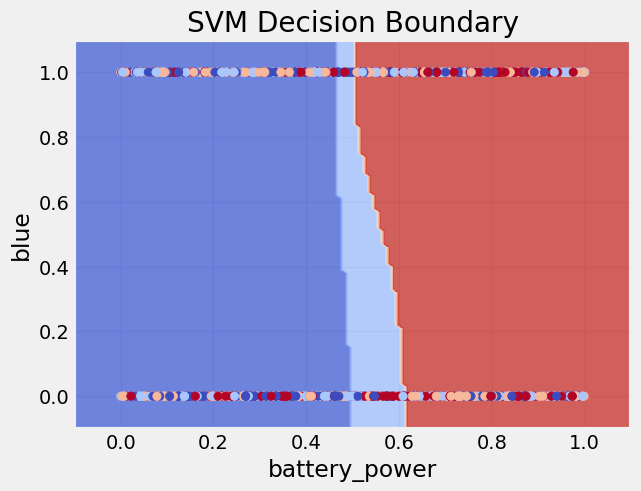

In [ ]:
# Visualisasi Model SVM
attr1 = 0
attr2 = 1

# Ambil data dari data training
X_train_vis = x_train.iloc[:, [attr1, attr2]].to_numpy()
y_train_vis = y_train

# Inisialisasi model SVM (dalam contoh ini, kami menggunakan parameter default)
svm_model = SVC()
svm_model.fit(X_train_vis, y_train_vis)

# meshgrid untuk plot decision boundary
x_min, x_max = X_train_vis[:, 0].min() - 0.1, X_train_vis[:, 0].max() + 0.1
y_min, y_max = X_train_vis[:, 1].min() - 0.1, X_train_vis[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualisasikan decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, cmap=plt.cm.coolwarm)
plt.xlabel(x_train.columns[attr1])
plt.ylabel(x_train.columns[attr2])
plt.title("SVM Decision Boundary")
plt.show()

---
Confusion matrix dan akurasi
--- ---

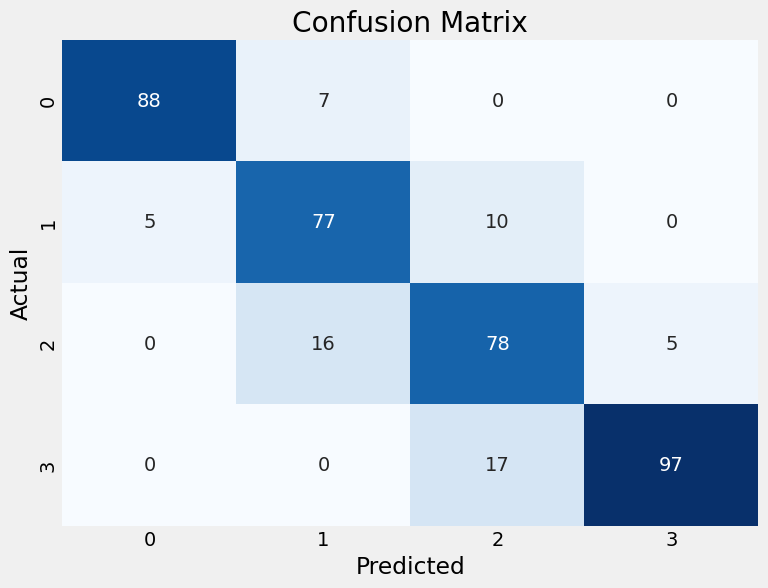

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        95
           1       0.77      0.84      0.80        92
           2       0.74      0.79      0.76        99
           3       0.95      0.85      0.90       114

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



In [ ]:
# Inisialisasi model SVM (dalam contoh ini, kami menggunakan parameter default)
svm_model = SVC()

# Latih model dengan data training
svm_model.fit(x_train, y_train)

# Lakukan prediksi pada data testing
y_pred = svm_model.predict(x_test)

# Hitung confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Tampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Tampilkan laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


# 4. Clustering: Agglomerative Clustering

Algoritma Agglomerartive Clustering
--- ---

In [ ]:
# Inisialisasi model Agglomerative Clustering
agg_kwargs = {"n_clusters": optimal_cluster_count, "linkage": "ward"}  # Gantilah parameter sesuai kebutuhan

agg_cluster_model = AgglomerativeClustering(**agg_kwargs)

# Latih model dengan data yang telah diproses
agg_cluster_model.fit(x_scaled_df)


AgglomerativeClustering()

Jumlah klaster optimal (Elbow Point) dengan Agglomerative Clustering: 4


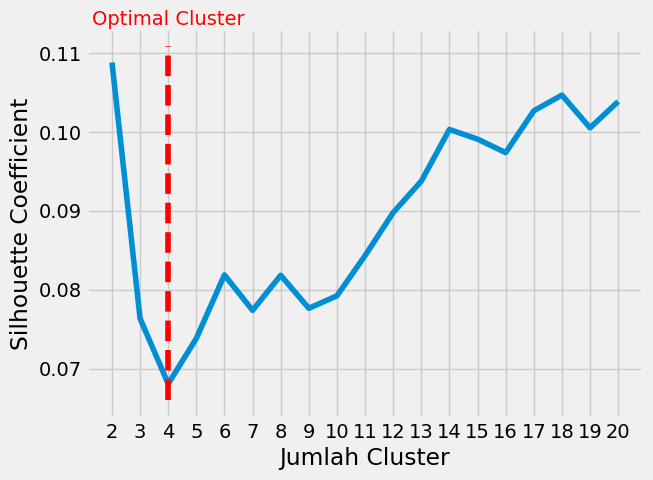

In [ ]:
# Kode untuk menampilkan Elbow Point
agg_silhouette_coefficients = []

for k in range(2, 21):
    agg_cluster = AgglomerativeClustering(n_clusters=k, linkage="ward")
    agg_cluster.fit(x_scaled_df)
    score = silhouette_score(x_scaled_df, agg_cluster.labels_)
    agg_silhouette_coefficients.append(score)

# Plot Silhouette Coefficients
plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), agg_silhouette_coefficients)
plt.xticks(range(2, 21))
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Coefficient")

# Menentukan jumlah klaster optimal (Elbow Point) berdasarkan silhouette score
agg_kl = KneeLocator(x=range(2, 21), y=agg_silhouette_coefficients, curve="convex", direction="decreasing")
agg_optimal_cluster_count = agg_kl.elbow

print("Jumlah klaster optimal (Elbow Point) dengan Agglomerative Clustering:", agg_optimal_cluster_count)

# Tampilkan jumlah klaster optimal (Elbow Point) dengan Agglomerative Clustering
plt.vlines(agg_optimal_cluster_count, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r')
plt.text(agg_optimal_cluster_count, plt.ylim()[1], 'Optimal Cluster', va='bottom', ha='center', color='r')

plt.show()  # Menampilkan plot Elbow Point


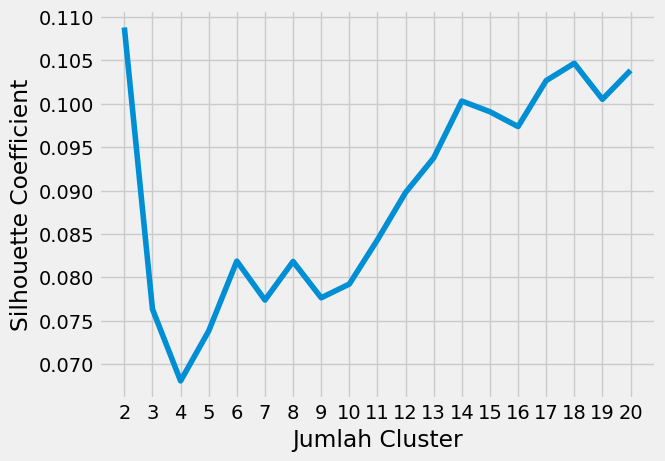

In [ ]:
# Kode untuk menampilkan Silhouette Coefficients
agg_silhouette_coefficients = []

for k in range(2, 21):
    agg_cluster = AgglomerativeClustering(n_clusters=k, linkage="ward")
    agg_cluster.fit(x_scaled_df)
    score = silhouette_score(x_scaled_df, agg_cluster.labels_)
    agg_silhouette_coefficients.append(score)

# Plot Silhouette Coefficients
plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), agg_silhouette_coefficients)
plt.xticks(range(2, 21))
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Coefficient")

plt.show()
